In [6]:
#............................................Training & Testing using deep learning......................................#
import os
import cv2
import time
import numpy as np
from keras.layers import Conv2D 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
path = 'Preprocessed/Train/'

In [8]:
gestures = os.listdir(path)

In [9]:
gestures

['GOODBYE',
 'HELLO',
 'I HATE YOU',
 'I LOVE YOU',
 'MEET YOU',
 'NICE TO',
 'THANK YOU']

In [10]:
dict_labels={}
for i in range(len(gestures)):
    dict_labels[gestures[i]]=i
    

In [11]:
dict_labels

{'GOODBYE': 0,
 'HELLO': 1,
 'I HATE YOU': 2,
 'I LOVE YOU': 3,
 'MEET YOU': 4,
 'NICE TO': 5,
 'THANK YOU': 6}

In [12]:
print(list(dict_labels.keys()))

['GOODBYE', 'HELLO', 'I HATE YOU', 'I LOVE YOU', 'MEET YOU', 'NICE TO', 'THANK YOU']


In [13]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [14]:
X = np.array(x)
Y = np.array(y)
Y = np_utils.to_categorical(Y)
Y.shape

(7000, 7)

<AxesSubplot:ylabel='count'>

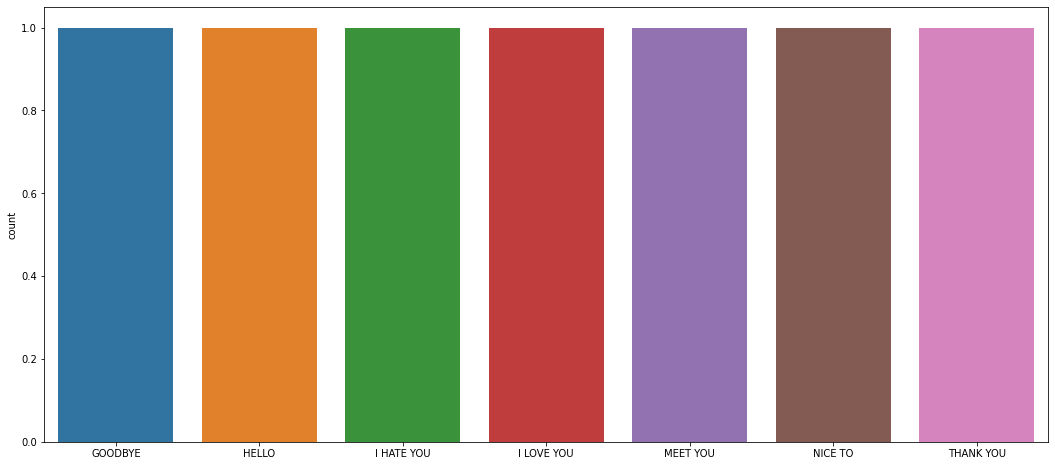

In [15]:
plt.figure(figsize = (18,8))
sns.countplot(x=list(dict_labels.keys()))

In [16]:
Y.shape

(7000, 7)

In [17]:
categories = Y.shape[1]

In [18]:
X, Y = shuffle(X, Y, random_state=0)

In [19]:
X.shape

(7000, 50, 50, 1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [21]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4900, 50, 50, 1) (2100, 50, 50, 1)
(4900, 7) (2100, 7)


In [22]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [23]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [26]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
39/39 [==============================] - 39s 983ms/step - loss: 0.0278 - accuracy: 0.9933 - val_loss: 0.0257 - val_accuracy: 0.9943
Epoch 2/5
39/39 [==============================] - 35s 912ms/step - loss: 0.0194 - accuracy: 0.9947 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 3/5
39/39 [==============================] - 36s 914ms/step - loss: 0.0076 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 4/5
39/39 [==============================] - 37s 937ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0127 - val_accuracy: 0.9962
Epoch 5/5
39/39 [==============================] - 36s 915ms/step - loss: 0.0134 - accuracy: 0.9963 - val_loss: 0.0024 - val_accuracy: 0.9995


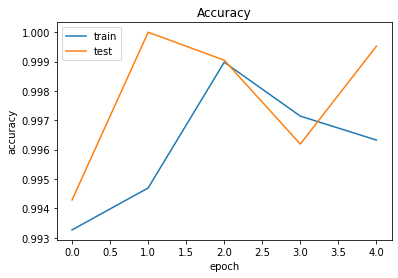

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [38]:
model.save('CNN_model.h5')

In [39]:
m = load_model('CNN_model.h5')

In [40]:
test_data = os.listdir('Test/')

In [41]:
dict_labels

{'GOODBYE': 0,
 'HELLO': 1,
 'I HATE YOU': 2,
 'I LOVE YOU': 3,
 'MEET YOU': 4,
 'NICE TO': 5,
 'THANK YOU': 6}

In [42]:
for ix in test_data:
    print(ix)

GOODBYE
HELLO
I HATE YOU
I LOVE YOU
MEET YOU
NICE TO
THANK YOU


In [43]:
x, y = [], []
for ix in test_data:
    images = os.listdir('Test/' + ix)
    for cx in range(1,201):
        img_path = 'Test/' + ix + '/' + str(cx) + '.jpg'
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [44]:
X_t = np.array(x)
y_t = np.array(y)
Y_t = np_utils.to_categorical(y_t)

In [45]:
X_t.shape

(1400, 50, 50, 1)

In [46]:
y_pred = m.predict(X_t)

In [47]:
acc = accuracy_score(Y_t, y_pred.round())
print('Accuracy:', acc)

Accuracy: 0.9992857142857143


In [48]:
print(classification_report(y_pred.round(), Y_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       201
           3       1.00      1.00      1.00       200
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       200
           6       0.99      1.00      1.00       199

   micro avg       1.00      1.00      1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400
 samples avg       1.00      1.00      1.00      1400

